<a href="https://colab.research.google.com/github/tbrocco/mestrado/blob/main/aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [32]:
set(y)

{0, 1, 2}

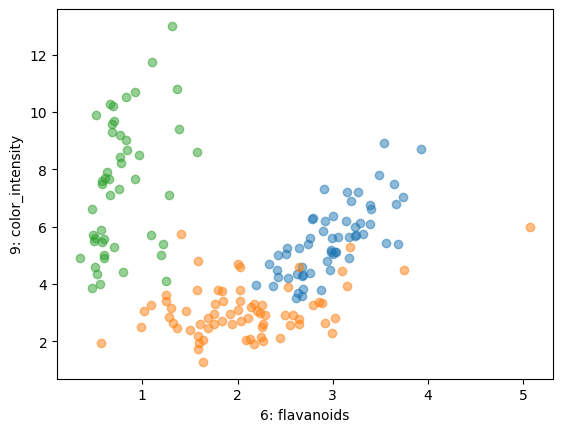

In [33]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [34]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [35]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [36]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.30891800e-04, 1.22070312e-04, 6.31809235e-05, 6.19888306e-05,
        6.00814819e-05]),
 'score_time': array([0.00319815, 0.00246739, 0.00159097, 0.00154996, 0.0018456 ]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[13,  2,  3],
       [ 1, 16,  7],
       [ 0,  1, 11]])

In [38]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.7411175710594317

In [39]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [40]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([1.25885010e-04, 8.65459442e-05, 8.41617584e-05, 1.09672546e-04,
        8.53538513e-05]),
 'score_time': array([0.00428414, 0.00377154, 0.00418544, 0.0037024 , 0.00360227]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [41]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([1.56402588e-04, 6.19888306e-05, 6.19888306e-05, 6.05583191e-05,
        8.10623169e-05]),
 'score_time': array([0.00621557, 0.00423503, 0.00400209, 0.00409985, 0.00404191]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [42]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([7.67707825e-05, 8.39233398e-05, 6.81877136e-05, 6.65187836e-05,
        8.20159912e-05, 6.48498535e-05, 9.60826874e-05, 6.34193420e-05,
        6.22272491e-05, 8.22544098e-05, 6.31809235e-05, 6.72340393e-05,
        6.72340393e-05, 6.43730164e-05, 6.67572021e-05, 6.60419464e-05,
        6.36577606e-05, 6.46114349e-05, 1.53779984e-04, 7.67707825e-05,
        6.58035278e-05, 9.36985016e-05, 6.36577606e-05, 6.17504120e-05,
        6.19888306e-05, 6.24656677e-05, 6.36577606e-05, 7.20024109e-05,
        6.15119934e-05, 7.89165497e-05, 6.74724579e-05, 6.55651093e-05,
        7.58171082e-05, 6.55651093e-05, 6.62803650e-05, 6.77108765e-05,
        7.10487366e-05, 6.50882721e-05, 6.93798065e-05, 6.62803650e-05,
        7.22408295e-05, 6.93798065e-05, 1.58071518e-04, 1.55925751e-04,
        7.20024109e-05, 7.22408295e-05, 1.17540359e-04, 1.19447708e-04,
        9.48905945e-05, 6.62803650e-05]),
 'score_time': array([0.01325941, 0.00612664, 0.0060482 , 0.00618005, 0.00601935,


In [43]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [44]:
modelo.intercept_

array([-105.,  114.,   19.])

In [45]:
modelo.coef_[:,[6,9]]

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

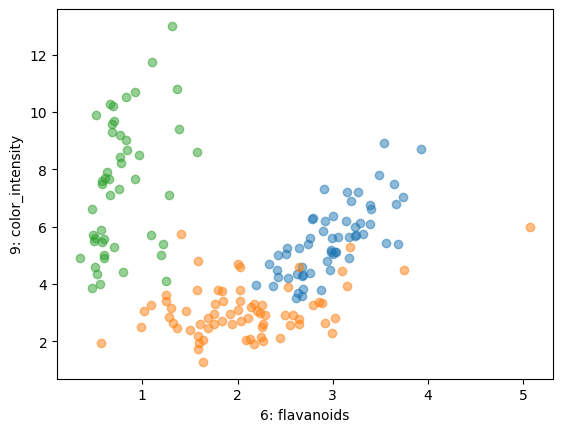

In [46]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)

plt.show()

In [53]:
# Obter os coeficientes das retas de hiperplano para as três classes
coef = modelo.coef_[:,[6,9]]
intercept = modelo.intercept_


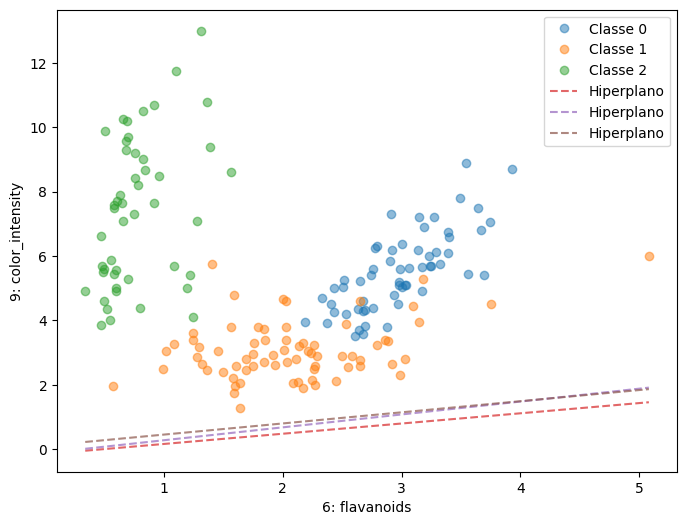

In [54]:
# Plotar as retas de hiperplano
plt.figure(figsize=(8, 6))

i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5, label=f'Classe {k}')

# Plote os hiperplanos usando os coeficientes
for coef_i in coef:
    intercept = modelos['estimator'][0].intercept_
    xx = np.linspace(min(X[:, i]), max(X[:, i]), 100)
    yy = (-coef_i[0] / coef_i[1]) * xx - (intercept[0] / coef_i[1])
    plt.plot(xx, yy, linestyle='--', label='Hiperplano', alpha=0.7)

plt.legend()
plt.show()



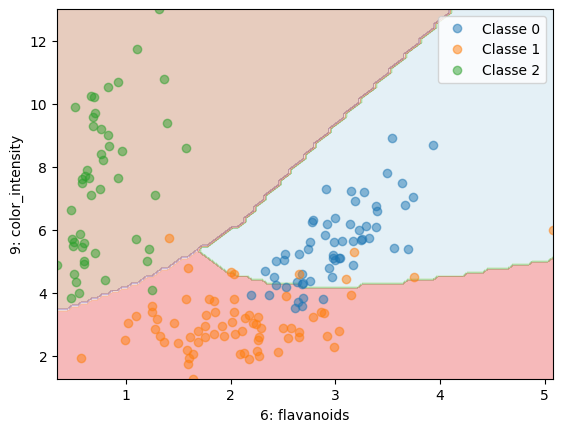

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold

# Plote os pontos de dados
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
    plt.plot(X[:, i][y == k], X[:, j][y == k], "o", alpha=0.5, label=f'Classe {k}')

# Crie e ajuste o modelo SVM com um kernel polinomial
clf = SVC(kernel='poly', degree=3)
clf.fit(X[:, [i, j]], y)

# Plote a superfície de decisão
xx, yy = np.meshgrid(np.linspace(min(X[:, i]), max(X[:, i]), 100),
                     np.linspace(min(X[:, j]), max(X[:, j]), 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.legend()
plt.show()